# Problem Set 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
dataDir = "./data/"

# Question 1




## Part A

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \log\left(1 + \exp\left(-y^{(i)}\theta^Tx^{(i)}\right)\right) 
= -\frac{1}{m} \sum_{i=1}^m \log \left(h_\theta\left(y^{(i)}x^{(i)}\right)\right)
$$

- Find the gradient

$$
\nabla J(\theta) = -\frac{1}{m} \sum_{i=1}^m \nabla \log \left(h_\theta\left(y^{(i)}x^{(i)}\right)\right) \\
= -\frac{1}{m} \sum_{i=1}^m  \frac{1}{h_\theta\left(y^{(i)}x^{(i)}\right)}h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)} \\
= -\frac{1}{m} \sum_{i=1}^m  \left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)} \\
\implies \frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^m  \left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)}_j
$$


- Find the Hessian

$$
\nabla^2J(\theta)_{jk} = \frac{\partial^2J(\theta)}{\partial\theta_j\partial\theta_k} = \frac{\partial}{\partial\theta_k} \left(-\frac{1}{m} \sum_{i=1}^m  \left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)}_j \right)\\
= -\frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j \frac{\partial}{\partial\theta_k} \left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right) \\
= \frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j \frac{\partial}{\partial\theta_k} h_\theta\left(y^{(i)}x^{(i)}\right) \\
= \frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)}_k \\
= \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)x^{(i)}_jx^{(i)}_k-\frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j \frac{\partial}{\partial\theta_k} \left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right) \\
= \frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j \frac{\partial}{\partial\theta_k} h_\theta\left(y^{(i)}x^{(i)}\right) \\
= \frac{1}{m}\sum_{i=1}^{m} y^{(i)}x^{(i)}_j h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)y^{(i)}x^{(i)}_k \\
= \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)x^{(i)}_jx^{(i)}_k \\
\implies H = \nabla^2J(\theta) = \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)x^{(i)}x^{(i)T}
$$

- Show H is PSD
$$
H = \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)x^{(i)}x^{(i)T} \\
z^THz =  \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)z^Tx^{(i)}x^{(i)T}z
$$

In ps0 Question 2a we proved $z^Tx^{(i)}x^{(i)T}z \ge 0$. Because $h_\theta\left(z\right)\in(0,1)$ we know $h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right) \ge 0$. Thus 
$$
h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)z^Tx^{(i)}x^{(i)T}z \ge 0
$$

which implies 
$$
z^THz =  \frac{1}{m}\sum_{i=1}^{m} h_\theta\left(y^{(i)}x^{(i)}\right)\left(1-h_\theta\left(y^{(i)}x^{(i)}\right)\right)z^Tx^{(i)}x^{(i)T}z \ge 0
$$
which is what we wanted to show. QED

## Part B

In [3]:
# data
X = pd.read_fwf(dataDir + "logistic_x.txt", header=None, names=["x1", "x2"])
X["x0"] = 1 # add intercept
X = X[["x0", "x1", "x2"]] # reorder columns 
y = pd.read_fwf(dataDir + "logistic_y.txt", header=None, names=["y"])

print(X.head())

   x0        x1        x2
0   1  1.343250 -1.331148
1   1  1.820553 -0.634668
2   1  0.986321 -1.888576
3   1  1.944373 -1.635452
4   1  0.976734 -1.353315


In [4]:
print(y.head())

     y
0 -1.0
1 -1.0
2 -1.0
3 -1.0
4 -1.0


In [5]:
# convert df to arrays
X = X.values
y = y.values

- Newton's Method

$\theta^{(t+1)} = \theta^{(t)} - H^{-1}\nabla J(\theta^{(t)})$

In [6]:
# sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
# derivative/gradient of sigmoid
def sigmoidGrad(z):
    return sigmoid(z)*(1-sigmoid(z))

In [8]:
# emperical loss function
def empericalLoss(theta, y, x):
    m = x.shape[0] # number of rows
    loss = 0
    for i in range(m):
        loss += np.log(sigmoid(y[i]*theta@x[i,:]))
    return -loss/m

In [9]:
# emperical loss gradient
def empericalLossGrad(theta, y, x):
    m = x.shape[0]
    n = x.shape[1]
    lossGrad = np.zeros(n)
    for i in range(m):
        lossGrad += (1-sigmoid(y[i]*theta@x[i,:]))*y[i]*x[i,:]
    return -lossGrad/m

In [10]:
# emperical loss hessian
def empericalLossHess(theta, y, x):
    m = x.shape[0]
    n = x.shape[1]
    lossHess = np.zeros((n,n))
    for i in range(m):
        lossHess += sigmoidGrad(y[i]*theta@x[i,:]) * np.outer(x[i,:],x[i,:])
    return lossHess/m

In [11]:
# Newton's Method
def NewtonMethod(theta0, y, x, eps = 1e-8):
    theta = theta0
    diff = np.inf
    while diff > eps:
        thetaPrevious = theta.copy()
        theta -= np.linalg.inv(empericalLossHess(theta, y, x)) @ empericalLossGrad(theta, y, x)
        diff = np.sqrt(sum((theta - thetaPrevious)**2))
    
    return theta

In [12]:
theta0 = np.zeros(3)
theta = NewtonMethod(theta0, y, X)
print(f"{theta = }")


theta = array([-2.6205116 ,  0.76037154,  1.17194674])


## Part C

- calculate decison boundary

$$
0.5 = h_\theta(x) = \frac{1}{1+\exp\left(\theta^Tx\right)} \\
\implies \exp\left(\theta^Tx\right) = 1 \\
\implies \theta_0 + \theta_1x_1 + \theta_2x_2 = 0 \\
\implies x_2 = -\frac{\theta_1x_1+\theta_0}{\theta_2}
$$

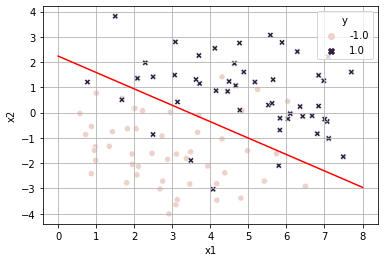

In [13]:
df = pd.DataFrame(np.hstack((X,y)), columns = ["x0", "x1", "x2", "y"])

# plot data
sns.scatterplot(x="x1", y="x2", style="y", hue = "y", data=df)
plt.grid(True)
# plot decison boundary
minx1 = 0
maxx1 = 8
plt.plot([minx1,maxx1], [-(theta[1]*minx1+theta[0])/theta[2],-(theta[1]*maxx1+theta[0])/theta[2]], color = "r")

# Question 2



## Part A

- exp form
$$
p(y;\eta) = b(y)\exp\left(\eta^T T(y) - a(\eta)\right)
$$

- Poisson Distribution
$$
p(y:\lambda) = \frac{\exp\left(-\lambda\right)\lambda^y}{y!} = \frac{1}{y!}\exp\left(-\lambda\right)\exp\left(y\log \lambda\right) = \frac{1}{y!}\exp\left(y\log\lambda - \lambda \right)
$$

$$
b(y) = \frac{1}{y}\\
\eta = \log\lambda\\
\lambda = \exp \eta \\
T(y) = y\\
a(\eta) = \exp \eta = \lambda
$$

## Part B

- canonical response function

$g(\eta) = \lambda = \exp \eta$


## Part C

$$
\ell = \log p(y \vert x;\theta) = \log \frac{\exp \left(-\lambda\right)\left(\lambda\right)^{y}}{y!} \\
 = -\log y! - \lambda + y \log \lambda \\
 = -\log y! - \exp \eta + y \eta \\
 = -\log y! - \exp \left(\theta^T x\right) + y \theta^T x \\
$$

$$
\nabla \ell = \nabla \left(-\log y! - \exp \left(\theta^T x\right) + y \theta^T x\right) \\
= \nabla y \theta^T x  - \nabla \exp \left(\theta^T x\right) \\
= yx - \exp \left(\theta^T x\right) x\\
= \left(y - \exp \left(\theta^T x\right)\right) x\\
\implies \frac{\partial \ell}{\partial \theta_j} = \left(y - \exp \left(\theta^T x\right)\right) x_j
$$

- Gradient Ascent

$$
\theta_j^{(t+1)} = \theta_j^{(t)} + \alpha \left(y - \exp \left(\theta^{(t)T} x\right)\right) x_j
$$

## Part D

$$
p(y;\eta) = b(y)\exp\left(\eta^T T(y) - a(\eta)\right) \\
= b(y)\exp\left(\theta^T x y - a(\theta^T x)\right) \\
$$

$$
\log p(y;\eta) = \log \left(b(y)\exp\left(\theta^T x y - a(\theta^T x)\right)\right) \\
= \log b(y) + \theta^T x y - a(\eta)
$$

$$
\nabla \log p(y;\eta) = \nabla \left(\log b(y) + \theta^T x y - a(\theta^T x)\right) \\
= \nabla \theta^T x y - \nabla a\left(\theta^T x\right) \\
= yx - a'\left(\theta^T x\right)x \\
= \left(y-h_\theta(x)\right)x
$$

- Gradient Ascent

$$
\theta_j^{(t+1)} = \theta_j^{(t)} + \alpha \left(y - h_\theta(x)\right) x_j
$$

# Question 3



## Part A

- $y = 1$

$$
p(y = 1 \vert x;\phi, \Sigma, \mu_{1}, \mu_{-1}) = \frac{p(y = 1,x)}{p(x)} = \frac{p(x \vert y=1)p(y=1)}{\sum_{j\in\{1,-1\}} p(x \vert y = j)p(y = j)}
$$

$$
= \frac{\frac{1}{(2\pi)^\frac{d}2\vert\Sigma\vert^\frac{1}{2}}\exp\left(\frac{-1}{2}(x-\mu_{1})^T \Sigma^{-1} (x-\mu_{1})\right)\phi}{\frac{1}{(2\pi)^\frac{d}2\vert\Sigma\vert^\frac{1}{2}}\exp\left(\frac{-1}{2}(x-\mu_{1})^T \Sigma^{-1} (x-\mu_{1})\right)\phi + \frac{1}{(2\pi)^\frac{d}2\vert\Sigma\vert^\frac{1}{2}}\exp\left(\frac{-1}{2}(x-\mu_{-1})^T \Sigma^{-1} (x-\mu_{-1})\right)(1-\phi)}
$$

$$
= \frac{\exp\left(\frac{-1}{2}(x-\mu_{1})^T \Sigma^{-1} (x-\mu_{1})\right)\phi}{\exp\left(\frac{-1}{2}(x-\mu_{1})^T \Sigma^{-1} (x-\mu_{1})\right)\phi + \exp\left(\frac{-1}{2}(x-\mu_{-1})^T \Sigma^{-1} (x-\mu_{-1})\right)(1-\phi)}
$$

$$
= \frac{1}{1 + \exp\left(\frac{-1}{2}(x-\mu_{-1})^T \Sigma^{-1} (x-\mu_{-1}) + \frac{1}{2}(x-\mu_{1})^T \Sigma^{-1} (x-\mu_{1})\right)\frac{(1-\phi)}{\phi}}
$$

$$
= \frac{1}
{1 + \exp\left( \log \frac{1-\phi}{\phi}
- \frac{1}{2}x^T\Sigma^{-1}x + \frac{1}{2}x^T\Sigma^{-1}\mu_{-1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}x - \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \frac{1}{2}x^T\Sigma^{-1}x - \frac{1}{2}x^T\Sigma^{-1}\mu_{1}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}x
+ \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
\right)} 
$$

$$
= \frac{1}
{1 + \exp\left( \log \frac{1-\phi}{\phi}
+ \frac{1}{2}x^T\Sigma^{-1}\mu_{-1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}x - \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
- \frac{1}{2}x^T\Sigma^{-1}\mu_{1}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}x
+ \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
\right)} 
$$

$$
= \frac{1}
{1 + \exp\left( \log \frac{1-\phi}{\phi}
+ \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
- \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \mu_{-1}^T\Sigma^{-1}x
- \mu_{1}^T\Sigma^{-1}x
\right)} 
$$

$$
= \frac{1}
{1 + \exp\left( \log \frac{1-\phi}{\phi}
+ \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
- \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{-1}^T\Sigma^{-1}
- \mu_{1}^T\Sigma^{-1}\right)x
\right)} 
$$

$$
= \frac{1}
{1 + \exp\left(-1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
$$

- $y = -1$

$$
p(y = -1 \vert x;\phi, \Sigma, \mu_{1}, \mu_{-1}) = 1-p(y = 1 \vert x;\phi, \Sigma, \mu_{1}, \mu_{-1})
$$

$$
= 1 - 
\frac{1}
{1 + \exp\left(-1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
$$

$$
= \frac{\exp\left(-1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
{1 + \exp\left(-1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
$$

$$
=
\frac{1}
{1 + \exp\left(1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
$$

Thus we have shown

$$
p(y \vert x; \phi, \Sigma, \mu_{1}, \mu_{-1}) = 
\begin{cases}
    \frac{1}
{1 + \exp\left(-1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)} \quad &\text{if} \, y=1 \\
    \frac{1}
{1 + \exp\left(1\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)} \quad &\text{if} \, y=-1 \\
\end{cases}
$$

$$
= \frac{1}
{1 + \exp\left(-y\left( \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}
+ \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}x
\right)\right)}
$$

If we set

$$
\theta_0 = \log \frac{\phi}{1-\phi}
- \frac{1}{2}\mu_{1}^T\Sigma^{-1}\mu_{1}
+ \frac{1}{2}\mu_{-1}^T\Sigma^{-1}\mu_{-1}\\
\theta = \left(\mu_{1}^T-\mu_{-1}^T\right)\Sigma^{-1}
$$

then we get

$$
p(y \vert x; \phi, \Sigma, \mu_{1}, \mu_{-1}) = \frac{1}{1+\exp\left(-y\left(\theta_0 + \theta^Tx\right)\right)}
$$

which is what we wanted to show.

## Part B

See Part C.

## Part C

We will define $\#(\cdot)$ as the count of $(\cdot)$. For example $\#(y^{(i)} = 1) \equiv \sum_{i=1}^m I \left(y^{(i)} = 1\right)$.

$$
p(x \vert z, \mu_1, \mu_{-1}, \Sigma, \phi) = \frac{1}{(2\pi)^\frac{d}{2}\vert\Sigma\vert^\frac{1}{2}} \exp \left(\frac{-1}{2}(x-\mu_{y})^T \Sigma^{-1} (x-\mu_{y})\right) p(z)
$$

$$
\ell = \log \prod_{i=1}^m p(x^{(i)}, y^{(i)}; \phi, \mu_{-1}, \mu_{1}, \Sigma) \\
= \log \prod_{i=1}^m p(x^{(i)};  y^{(i)}, \mu_{-1}, \mu_{1}, \Sigma)p(y^{(i)};\phi)
$$

$$
= \sum_{i=1}^m \log p(x^{(i)};  y^{(i)}, \mu_{-1}, \mu_{1}, \Sigma) + \sum_{i=1}^m p(y^{(i)};\phi)
$$

$$
= \sum_{i=1}^m \log \frac{1}{(2\pi)^\frac{d}{2} \vert \Sigma \vert^\frac{1}{2}} \exp \left(\frac{1}{2}(x^{(i)}-\mu_{y})^T \Sigma^{-1} (x^{(i)}-\mu_{y})\right) + \sum_{i=1}^m \log p(y^{(i)};\phi)
$$

Let $f$ be the number of data such that $y^{(i)} = 1$ $\left(f = \sum_{i=1}^mI(y^{(i)}=1)\right)$. Rearrange the data so that data where  $i \in \{1:f\}$ implies $y^{(i)} = 1$, thus $i \in \{f+1:m\}$ implies $y^{(i)} = -1$. Thus we get

$$
\sum_{i=1}^m \log \frac{1}{(2\pi)^\frac{d}{2} \vert \Sigma \vert^\frac{1}{2}} \exp \left(\frac{1}{2}(x^{(i)}-\mu_{y})^T \Sigma^{-1} (x^{(i)}-\mu_{y})\right) + \sum_{i=1}^m \log p(y^{(i)};\phi)
$$

$$
= \sum_{i=1}^f \log \left(\frac{1}{(2\pi)^\frac{d}{2} \vert \Sigma \vert^\frac{1}{2}} \exp \left(\frac{1}{2}(x^{(i)}-\mu_{1})^T \Sigma^{-1} (x^{(i)}-\mu_{1})\right)\right)
\\+
\sum_{i=f+1}^m \log \left(\frac{1}{(2\pi)^\frac{d}{2} \vert \Sigma \vert^\frac{1}{2}} \exp \left(\frac{1}{2}(x^{(i)}-\mu_{-1})^T \Sigma^{-1} (x^{(i)}-\mu_{-1})\right)\right)
+
\sum_{i=1}^f \log \phi
+
\sum_{i=1}^f \log \left(1-\phi\right)
$$

$$
= -\sum_{i=1}^m \frac{d}{2}\log 2\pi
-
\sum_{i=1}^m\frac{1}{2}\log \vert\Sigma\vert
+
\sum_{i=1}^f \frac{1}{2}(x^{(i)}-\mu_{1})^T \Sigma^{-1} (x^{(i)}-\mu_{1})
+
\sum_{i=f+1}^m \frac{1}{2}(x^{(i)}-\mu_{-1})^T \Sigma^{-1} (x^{(i)}-\mu_{-1})
\\+
f \log \phi
+
(m-f) \log \left(1-\phi\right)
$$

- $\frac{\partial \ell}{\partial \phi}$

$$
\frac{\partial \ell}{\partial \phi} = \frac{\partial}{\partial \phi} f \log \phi + (m-f) \log \left(1-\phi\right)
$$

$$
= \frac{f}{\phi} + \frac{m-f}{1-\phi}
$$

maximize

$$
\frac{f}{\phi} + \frac{m-f}{1-\phi} = 0
$$

$$
\implies \frac{f}{\phi} = \frac{f-m}{\phi-1}
$$

$$
\implies f\phi - f = f\phi - m\phi
$$

$$
\implies  \phi = \frac{f}{m} = \frac{\#(y^{(i)} = 1)}{m}
$$

- $\nabla_{\mu_{1}}\ell / \nabla_{\mu_{-1}}\ell$

$$
\nabla_{\mu_{1}}\ell = \nabla_{\mu_{1}} \sum_{i=1}^f \frac{1}{2}(x^{(i)}-\mu_{1})^T \Sigma^{-1} (x^{(i)}-\mu_{1})
$$

$$
=\frac{1}{2} \nabla_{\mu_{1}} \left(\sum_{i=1}^f \left(x^{(i)T}\Sigma^{-1}x^{(i)} - \mu_{1}^T\Sigma^{-1}x^{(i)} - x^{(i)T}\Sigma^{-1}\mu_{1} + \mu_{1}^T\Sigma^{-1}\mu_{1}\right)\right)
$$

$$
=\frac{1}{2} \nabla_{\mu_{1}} \left(\sum_{i=1}^f- 2x^{(i)T}\Sigma^{-1}\mu_{1} + \mu_{1}^T\Sigma^{-1}\mu_{1}\right)
$$

$$
=\frac{1}{2} \sum_{i=1}^f- 2\Sigma^{-1}x^{(i)} + 2\Sigma^{-1}\mu_{1}
$$

$$
= \Sigma^{-1} \sum_{i=1}^f (\mu_{1}-x^{(i)})
$$

maximize

$$
\Sigma^{-1} \sum_{i=1}^f (\mu_{1}-x^{(i)}) = 0
$$

$$
\implies f \mu_{1} = \sum_{i=1}^f x^{(i)}
$$

$$
\implies \mu_{1} = \frac{\sum_{i=1}^f x^{(i)}}{f} = \frac{\sum_{i=1}^m x^{(i)}I(y^{(i)}=1)}{\#(y^{(i)}=1)}
$$

If we switch $\mu_1$ to $\mu_{-1}$ the process is the same but the summation changes and we get

$$
\mu_{-1} = \frac{\sum_{i=f+1}^m x^{(i)}}{m-f} = \frac{\sum_{i=1}^m x^{(i)}I(y^{(i)}=-1)}{\#(y^{(i)}=-1)}
$$

- $\nabla_\Sigma \ell$

This method can be found in [Lecture 3](https://www.youtube.com/watch?v=Mi8wnYc1m04&list=PLoROMvodv4rNH7qL6-efu_q2_bPuy0adh&index=3) around time 1:44:00

Let $S = \Sigma^{-1}$ this implies

$$
\nabla_S \ell = 0 \iff \nabla_\Sigma^{-1} \ell = 0
$$

$$
\nabla_S \ell = \nabla_S \left(-
\sum_{i=1}^m\frac{1}{2}\log \vert S \vert 
+
\sum_{i=1}^f \frac{1}{2}(x^{(i)}-\mu_{1})^T S (x^{(i)}-\mu_{1})
+
\sum_{i=f+1}^m \frac{1}{2}(x^{(i)}-\mu_{-1})^T S (x^{(i)}-\mu_{-1})\right)
$$

$$
= \nabla_S \sum_{i=1}^m \frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^T S (x^{(i)}-\mu_{y^{(i)}})
-
\frac{m}{2} \nabla_S \log \vert S \vert
$$

$$
= \frac{1}{2}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}
-
\mu_{y^{(i)}})^T - \frac{m}{2}S^{-1}
$$

$$
= \frac{1}{2}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}
-
\mu_{y^{(i)}})^T - \frac{m}{2}\Sigma
$$

maximize

$$
\frac{1}{2} \sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}
-
\mu_{y^{(i)}})^T - \frac{m}{2}\Sigma
=
0
$$

$$
\implies \Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}-\mu_{y^{(i)}})^T
$$

Thus we have shown

$$
\phi = \frac{\#(y^{(i)} = 1)}{m} = \frac{1}{m}\sum_{i=1}^m I(y^{(i)} = 1)
$$

$$
\mu_{j} = \frac{\sum_{i=1}^m x^{(i)}I(y^{(i)}=j)}{\#(y^{(i)}=j)}
\text{, for } j\in\{-1, 1\}
$$

$$
\Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}-\mu_{y^{(i)}})^T
$$

which is what we wanted to show.

# Question 4

## Part A

Gradient and Hessian of $g(z)$.

$$
\nabla g(z) = \nabla f(Az) = A^T \nabla f(Az)
$$

$$
H_z = \nabla^2 g(z) = \nabla^2 f(Az) = A^T \nabla^2 f(Az) A
$$

$$
\implies H_z^{-1} = \left(A^T \nabla^2 f(Az) A\right)^{-1} = A^{-1} \left(\nabla^2 f(Az)\right)^{-1} \left(A^T\right)^{-1}
$$

We will prove $z^{(t+1)} = A^{-1} x^{(t+1)}$ using induction

Base case $t=0$:

$$
z^{(0)} = 0 = A^{-1}x^{(0)}
$$

Inductive step:

Assume this holds true for all cases where $m \le t$, we wts that this hold when $m = t+1$.

$$
x^{(t+1)} = x^{(t)} - H^{-1}_x \nabla f(x)
$$

$$
z^{(t+1)} = z^{(t)} - H^{-1}_z \nabla g(z)
$$

$$
= z^{(t)} - A^{-1} \left(\nabla^2 f(Az^{(t)})\right)^{-1} \left(A^T\right)^{-1} A^T \nabla f(Az^{(t)})
$$

$$
= z^{(t)} - A^{-1} \left(\nabla^2 f(Az^{(t)})\right)^{-1} \nabla f(Az^{(t)})
$$

$$
= A^{-1}x^{(t)} - A^{-1} \left(\nabla^2 f(AA^{-1}x^{(t)})\right)^{-1} \nabla f(AA^{-1}x^{(t)})
$$

$$
= A^{-1} \left(x^{(t)} - \left(\nabla^2 f(x^{(t)})\right)^{-1} \nabla f(x^{(t)})\right)
$$

$$
= A^{-1} \left(x^{(t)} - H_x^{-1} \nabla f(x^{(t)})\right)
$$

$$
= A^{-1} x^{(t+1)}
$$

which completes the inductive step. Thus we have shown $z^{(t+1)} = A^{-1} x^{(t+1)}$. Which is what we wanted to show. QED

## Part B

$$
x^{(t+1)} = x^{(t)} - \alpha \nabla f(x^{(t)})
$$

$$
z^{(t+1)} = z^{(t)} - \alpha \nabla g(z^{(t)}) = z^{(t)} - \alpha A^T \nabla f(Az)
$$

Assume for the sake of contradiction that gradient descent is invariant to linear reparameterizations. Then $z^{(t+1)} = A^{-1} x^{(t+1)}$ We know

$$
z^{(t+1)} = z^{(t)} - \alpha A^T \nabla f(Az^{(t)})
$$

$$
= A^{-1} x^{(t)} - \alpha A^T \nabla f(x^{(t)})
$$

$$
= A^{-1} \left(x^{(t)} - A A^T \alpha \nabla f(x^{(t)})\right)
$$

So we get

$$
z^{(t+1)} = A^{-1} \left(x^{(t)} - A A^T \alpha \nabla f(x^{(t)})\right) \neq A^{-1}\left(x^{(t)} - \alpha \nabla f(x^{(t)})\right) = A^{-1}x^{(t+1)}
$$

which is a contradiction, thus gradient descent is not invariant to linear reparameterizations. QED

# Question 5

In [14]:
# data
df_quasar_train = pd.read_csv(dataDir + "quasar_train.txt")#, header = 0, names=colNames)
df_quasar_test = pd.read_csv(dataDir + "quasar_test.txt")

colsToShow = 7
print(df_quasar_train.iloc[:, range(colsToShow)].head())

   1150.000  1151.000  1152.000  1153.000  1154.000  1155.000  1156.000
0     0.629     1.910     0.976     2.161     0.964     2.068     1.630
1    -0.161     1.830     0.609     1.932     0.932     0.857     0.978
2    -0.085    -1.304     0.691    -0.800    -1.090     1.087     0.734
3     1.283    -0.487     0.660     0.167    -1.217     1.535     2.264
4    -0.107     0.328     0.681     2.500     0.083     1.876     2.359


In [15]:
print(df_quasar_test.iloc[:, range(colsToShow)].head())

   1150.00  1151.00  1152.00  1153.00  1154.00  1155.00  1156.00
0    0.025    1.460   -0.057     1.37    2.090    1.150   -0.182
1    1.210    0.375    0.695    -0.09    0.275   -0.128    0.043
2    1.380   -0.436    2.700     1.18    1.850    0.374    2.290
3    0.427    0.509    1.060     0.80    0.537    0.288    2.790
4   -0.371    0.773   -0.621     1.84    0.284   -0.009    1.910


In [16]:
print(f"{df_quasar_train.shape = }")
print(f"{df_quasar_test.shape = }")

df_quasar_train.shape = (200, 450)
df_quasar_test.shape = (50, 450)


Each row is a training example

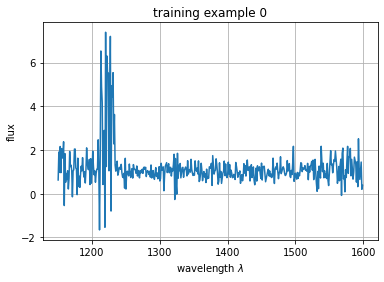

In [17]:
freqs = df_quasar_train.columns.astype(float)

plt.plot(freqs, df_quasar_train.iloc[0])
plt.title("training example 0")
plt.xlabel(r'wavelength $\lambda$')
plt.ylabel("flux")
plt.grid(True)

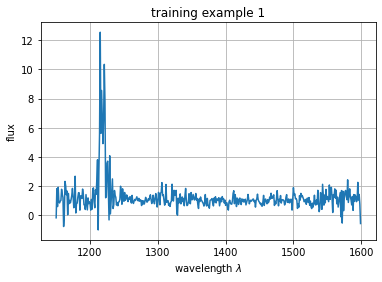

In [18]:
plt.plot(freqs, df_quasar_train.iloc[1])
plt.title("training example 1")
plt.xlabel(r'wavelength $\lambda$')
plt.ylabel("flux")
plt.grid(True)

## Part A I

Let $\omega = \{w^{(1)}, w^{(2)}, \cdots, w^{(m)}\}$. We will define $W$ as $diag(\omega)$ (diag was defined in ps0 Question 3).

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^m w^{(i)} \left(\theta^Tx^{(i)} - y^{(i)}\right)^2
$$

$$
= \frac{1}{2} \sum_{i=1}^m \left(\theta^Tx^{(i)} - y^{(i)}\right) w^{(i)} \left(\theta^Tx^{(i)} - y^{(i)}\right)
$$

This form is similar to linear regression. We know that

$$
\frac{1}{2} \sum_{i=1}^m \left(\theta^Tx^{(i)} - y^{(i)}\right) w^{(i)} \left(\theta^Tx^{(i)} - y^{(i)}\right)
$$

$$
= \left(X\theta - y\right)^T
\begin{bmatrix}
w^{(1)} \left(\theta^Tx^{(1)} - y^{(1)}\right)^2 \\
w^{(2)} \left(\theta^Tx^{(2)} - y^{(2)}\right)^2 \\
\vdots \\
w^{(m)} \left(\theta^Tx^{(m)} - y^{(m)}\right)^2
\end{bmatrix}
$$

$$
= \left(X\theta - y\right)^T diag(\omega) \left(X\theta - y\right)
$$

$$
= \left(X\theta - y\right)^T W \left(X\theta - y\right)
$$

Which is what we wanted to show.

## Part A II

$$
J(\theta) = \frac{1}{2}\left(X\theta - y\right)^TW\left(X\theta - y\right)
$$


$$
\nabla_\theta J(\theta) = \nabla_\theta \left(\frac{1}{2}\left(X\theta - y\right)^TW\left(X\theta - y\right)\right)
$$

$$
= \frac{1}{2} \nabla_\theta \left(\left(X\theta - y\right)^TW\left(X\theta - y\right)\right)
$$

$$
= \frac{1}{2} \nabla_\theta \left(\theta^TX^TWX\theta - \theta^TX^TWy - y^TWX\theta + y^TWy\right)
$$

$$
= \frac{1}{2} \nabla_\theta \left(\theta^TX^TWX\theta - 2y^TWX\theta\right)
$$

$$
= \frac{1}{2} \nabla_\theta \theta^T\left(X^TWX\right)\theta - \nabla_\theta \left(X^TWy\right)^T\theta
$$

$$
= X^TWX\theta - X^TWy
$$

Minimize

$$
X^TWX\theta - X^TWy = 0
\\
\implies \theta = \left(X^TWX\right)^{-1}X^TWy
$$

Thus we get get the colsed form solution for locally weighted linear regression.

## Part A III

$$
p(y^{(i)}\vert x^{(i)}; \theta) = \frac{1}{2\pi\sigma^{(i)}} \exp \left(-\frac{\left(y^{(i)} - \theta^Tx^{(i)}\right)^2}{2\sigma^{2(i)}}\right)
$$

$$
\log p(y^{(i)}\vert x^{(i)}; \theta) = - \log 2\pi\sigma^{(i)} - \frac{\left(y^{(i)} - \theta^Tx^{(i)}\right)^2}{2\sigma^{2(i)}}
$$

$$
\ell(\theta) = \sum_{i=1}^m \log p(y^{(i)}\vert x^{(i)}; \theta)
$$

$$
=  - \sum_{i=1}^m \log 2\pi\sigma^{(i)} - \sum_{i=1}^m \frac{\left(y^{(i)} - \theta^Tx^{(i)}\right)^2}{2\sigma^{2(i)}}
$$

$$
=  - \sum_{i=1}^m \log 2\pi\sigma^{(i)} - \frac{1}{2} \sum_{i=1}^m \left(y^{(i)} - \theta^Tx^{(i)}\right) \frac{1}{\sigma^{2(i)}} \left(y^{(i)} - \theta^Tx^{(i)}\right)
$$

Maximizing $\ell(\theta)$ is equivelent to minimizing 

$$
\sum_{i=1}^m \left(y^{(i)} - \theta^Tx^{(i)}\right) \frac{1}{\sigma^{2(i)}} \left(y^{(i)} - \theta^Tx^{(i)}\right)
$$

which is the cost function of weighted linear regression with $w^{(i)} = 
\frac{1}{\sigma^{2(i)}}$, which is what we wanted to show.

## Part B I

In [19]:
def linReg(X,y):
    # normal linear regression without local weighting
    return np.linalg.inv(X.T @ X) @ X.T @ y


In [20]:
y = df_quasar_train.iloc[0].values
X = np.array([np.ones(len(freqs)), freqs]).T

theta = linReg(X,y)
print(f"{theta[0] = :.4f}, {theta[1] = :.4f}")


theta[0] = 2.5134, theta[1] = -0.0010


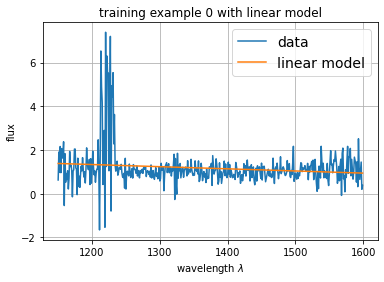

In [21]:
# plot the data and model
plt.plot(freqs, df_quasar_train.iloc[0], label = "data")
plt.plot(freqs, X@theta, label = "linear model")
plt.title("training example 0 with linear model")
plt.xlabel(r'wavelength $\lambda$')
plt.ylabel("flux")
plt.grid(True)
plt.legend(fontsize=14)

## Part B II

In [22]:
def getExpWeight(X, x, tau):
    m = X.shape[0] # number of rows, number of examples
    W = np.zeros((m,m))
    for i in range(m):
        W[i,i] = np.exp(-(X[i,1]-x)**2 / (2*tau**2))
        #if x == 1200:
        #    print(W[i,i])
    return W

def localWeightLinReg(X, y, x, W):
    # locally weighted linear regression
    return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

In [23]:
y = df_quasar_train.iloc[0].values # same as Part B I
X = np.array([np.ones(len(freqs)), freqs]).T # same as Part B I

df_train0 = pd.DataFrame({"freq":freqs, "theta0":np.nan, "theta1":np.nan, "pred":np.nan})
tau = 5
for i in range(df_train0.shape[0]):
    freq = df_train0.freq[i]
    W = getExpWeight(X, freq, tau)
    thetas = localWeightLinReg(X, y, freq, W)
    df_train0.theta0[i] = thetas[0]
    df_train0.theta1[i] = thetas[1]
    df_train0.pred[i] = thetas[0] + thetas[1]*freq


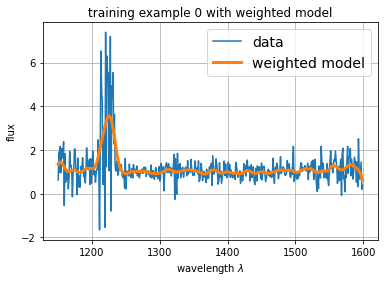

In [24]:
# plot the data and model
plt.plot(freqs, y, label = "data")
plt.plot(freqs, df_train0.pred, linewidth = 3, label = "weighted model")
plt.title("training example 0 with weighted model")
plt.xlabel(r'wavelength $\lambda$')
plt.ylabel("flux")
plt.grid(True)
plt.legend(fontsize=14)

## Part B III

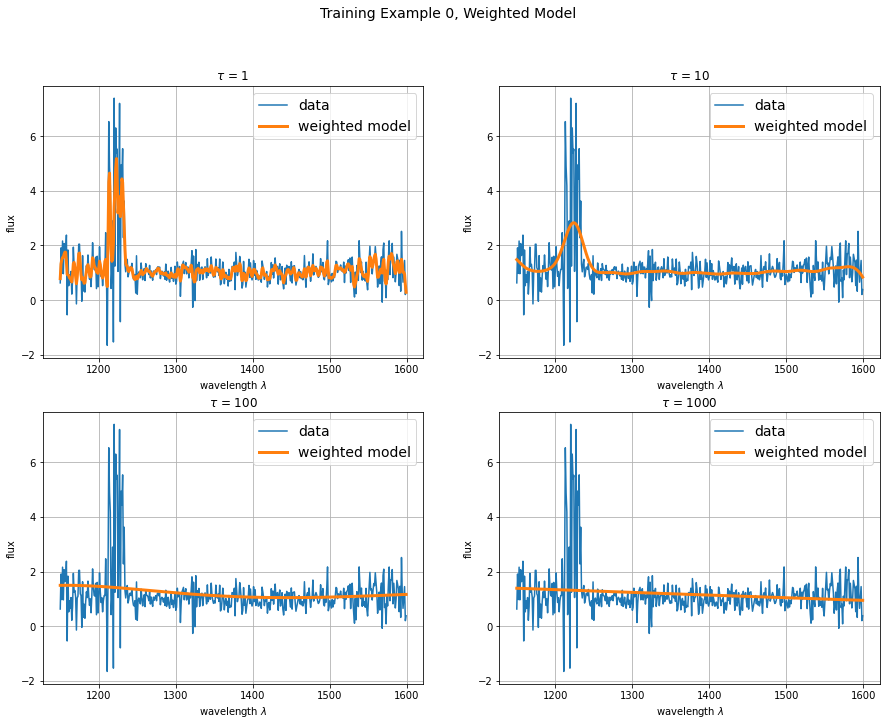

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15,11))
axes = axes.ravel()
plt.suptitle('Training Example 0, Weighted Model', fontsize = 14)
#fig = plt.figure()

idx = 0
m = df_train0.shape[0]
for tau in [1,10,100,1000]:
    pred_list = [np.nan for j in range(m)]
    for i in range(m):
        freq = df_train0.freq[i]
        W = getExpWeight(X, freq, tau)
        thetas = localWeightLinReg(X, y, freq, W)
        pred_list[i] = thetas[0] + thetas[1]*freq 
    
    
    # make plot
    ax = axes[idx]
    idx += 1
    ax.plot(freqs, y, label = "data")
    ax.plot(freqs, pred_list, linewidth = 3, label = "weighted model")
    ax.legend()
    ax.set_title(r"$\tau$ = "+f"{tau}")
    ax.set_xlabel(r'wavelength $\lambda$')
    ax.set_ylabel("flux")
    ax.grid(True)
    ax.legend(fontsize=14)

From the plots above we see that when $\tau$ is small $(\tau = 1)$ we have overfitting and when $\tau$ is large $(\tau \in \{100, 1000\})$ the model is smoothed out and the result are similar to the linear model because all $w^{(i)}$'s become close to 1. 

## Part C I

In [26]:
freqs = df_quasar_train.columns.astype(float) # same as above

def smoothData(Data, tau = 5):
    data = Data.copy()
    X = np.array([np.ones(len(freqs)), freqs]).T
    m, n = data.shape
    
    for row in range(m):
        # get values from row of data
        y = data.iloc[row].values
        # init prediction list
        pred_list = [np.nan for j in range(n)]
        for col in range(n):
            freq = freqs[col]
            W = getExpWeight(X, freq, tau)
            thetas = localWeightLinReg(X, y, freq, W)
            pred_list[col] = thetas[0] + thetas[1]*freq
        # replace row of data with smoothed predictions
        data.iloc[row] = pred_list
        
    return data

In [27]:
# smooth the training data
df_smooth_train = smoothData(df_quasar_train)

# smooth the test data
df_smooth_test = smoothData(df_quasar_test)

The smoothing function has been applied to both the train and test data sets.

## Part C II

In [28]:
def distFun(f1, f2):
    return np.linalg.norm(f1-f2)**2

def ker(t):
    return max(1 - t, 0)

def neighb(k, dists):
    return np.argsort(dists)[:, :k]

def findkNeighbors(k, f1, f2):
    dists = np.array([[distFun(f1.iloc[int(i)], f2.iloc[int(j)]) for j in f2.T] for i in f1.T])
    # calculate max distances for each row
    h = np.amax(dists, axis = 1)
    # change any 0 in dists to inf
    for i in dists.shape[0]:
        for j in dists.shape[1]:
            if dists[i,j] == 0:
                dists[i,j] = np.inf
    
    return neighb(k, dists), h
    
#def functionalRegression(f_train, f_raw_data, k):
    

In [29]:
rightSpectraLocations = freqs >= 1300
rightSpectra = freqs[rightSpectraLocations]
leftSpectraLocations = freqs < 1200
leftSpectra = freqs[leftSpectraLocations]

#split data sets
# noisy data data
df_right_train = df_quasar_train.iloc[:, rightSpectraLocations].copy()
df_left_train = df_quasar_train.iloc[:, leftSpectraLocations].copy()
df_right_test = df_quasar_test.iloc[:, rightSpectraLocations].copy()
df_left_test = df_quasar_test.iloc[:, leftSpectraLocations].copy()

# noisy data
df_right_train_smooth = df_smooth_train.iloc[:, rightSpectraLocations].copy()
df_left_train_smooth = df_smooth_train.iloc[:, leftSpectraLocations].copy()
df_right_test_smooth = df_smooth_test.iloc[:, rightSpectraLocations].copy()
df_left_test_smooth = df_smooth_test.iloc[:, leftSpectraLocations].copy()


In [30]:
# calculate distances between train and train data
dists = np.array([[distFun(df_right_train_smooth.iloc[int(i)], df_right_train_smooth.iloc[int(j)]) for j in df_right_train_smooth.T] for i in df_right_train_smooth.T])
# get h
h = np.amax(dists, axis = 1)
# find the k nearest neighbors
k = 3
# keeping neighbors where the dist is 0
neighbors = neighb(k, dists)

fHatLeft = np.zeros(df_left_train.shape)
for i in range(df_left_train.shape[0]):
    # equation 1 on pg 8 - calculate fhat_left for each training example
    fHatLeft[i] = np.array([[ker(dists[i,j]/h[i])*df_left_train_smooth.iloc[j].values] for j in neighbors[i]]).sum(axis=0) / sum([ker(dists[i,j]/h[i]) for j in neighbors[i]])
    
errors = [distFun(fHatLeft[i], df_left_train.iloc[i]) for i in range(df_left_train.shape[0])]
meanErrorTrain = np.array(errors).mean()

print(f"{meanErrorTrain = :.3f}")

meanErrorTrain = 23.759


The mean training error is 23.759. With using the training data to predict the training data of $\widehat{f_{left}}$ it is not clear if we should use the data from $f_{right}^{(i)}$ to predict $\widehat{f_{left}}^{(i)}$ because $d(f^{(i)}_{right},f^{(i)}_{right}) = 0$.

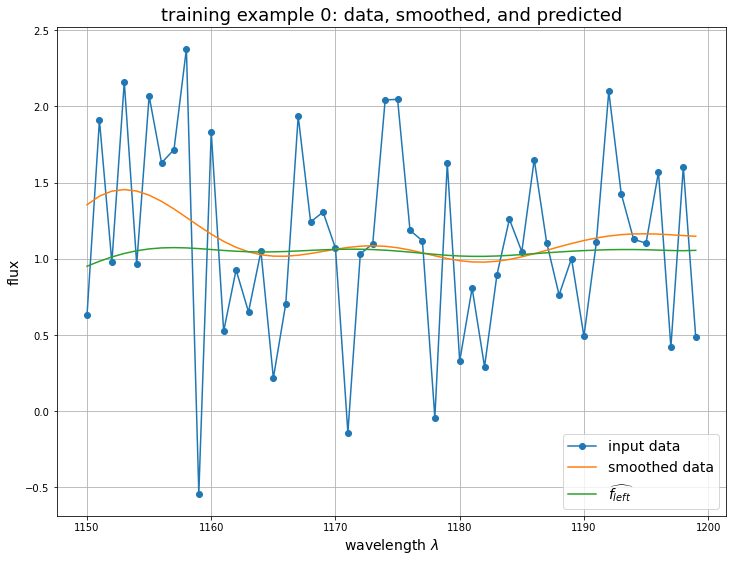

In [31]:
plt.figure(figsize = (12,9))
plt.plot(leftSpectra, df_left_train.iloc[0], marker = "o", label = "input data")
plt.plot(leftSpectra, df_left_train_smooth.iloc[0], label = "smoothed data")
plt.plot(leftSpectra, fHatLeft[0], label = r"$\widehat{f_{left}}$")
plt.title("training example 0: data, smoothed, and predicted", fontsize = 18)
plt.xlabel(r'wavelength $\lambda$', fontsize = 14)
plt.ylabel("flux", fontsize = 14)
plt.legend(loc = "lower right", fontsize = 14)
plt.grid(True)

## Part C III

In [32]:
# calculate distances between test and train data
dists = np.array([[distFun(df_right_test_smooth.iloc[int(i)].values, df_right_train_smooth.iloc[int(j)].values) for j in df_right_train_smooth.T] for i in df_right_test_smooth.T])
# get h
h = np.amax(dists, axis = 1)
# find the k nearest neighbors
k = 3
# find neighbors
neighbors = neighb(k, dists)

fHatLeft = np.zeros(df_left_test.shape)
for i in range(df_left_test_smooth.shape[0]):
    # equation 1 on pg 8 - calculate fhat_left for each training example
    fHatLeft[i] = np.array([[ker(dists[i,j]/h[i])*df_left_train_smooth.iloc[j].values] for j in neighbors[i]]).sum(axis=0) / sum([ker(dists[i,j]/h[i]) for j in neighbors[i]])
    
errors = [distFun(fHatLeft[i], df_left_train.iloc[i]) for i in range(fHatLeft.shape[0])]
meanErrorTrain = np.array(errors).mean()

print(f"{meanErrorTrain = :.3f}")

meanErrorTrain = 24.535


The mean error is 24.535

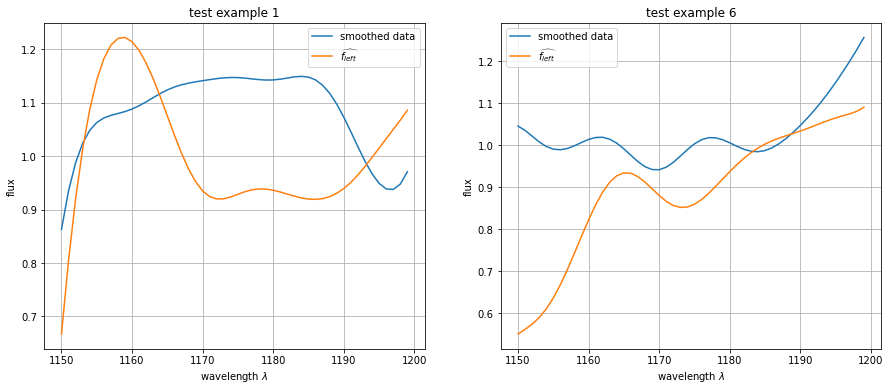

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(leftSpectra, df_left_train_smooth.iloc[1], label = "smoothed data")
ax[0].plot(leftSpectra, fHatLeft[1], label = r"$\widehat{f_{left}}$")
ax[0].set_title("test example 1")
ax[0].set_xlabel(r'wavelength $\lambda$')
ax[0].set_ylabel("flux")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(leftSpectra, df_left_train_smooth.iloc[6], label = "smoothed data")
ax[1].plot(leftSpectra, fHatLeft[6], label = r"$\widehat{f_{left}}$")
ax[1].set_title("test example 6")
ax[1].set_xlabel(r'wavelength $\lambda$')
ax[1].set_ylabel("flux")
ax[1].legend()
ax[1].grid(True)